In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import re
import os
import matplotlib.pyplot as plt
from scipy.stats import norm
from copy import deepcopy
from sklearn import tree
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_absolute_percentage_error
import warnings
import pickle
from pprint import pprint
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import seaborn as sns 
from sklearn.model_selection import train_test_split
import random

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from scipy.stats import norm
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import re
import time
import sys
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('ggplot')

warnings.filterwarnings("ignore")

from sklearn.datasets import make_classification

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_excel('LaLiga Dataset 2023-2024.xlsx')
df.tail()

,Fecha,Día,Sedes,Resultado,GF,GC,Adversario,Anfitrion,Edad(opp),Pos.(opp),...,RL(tm),PG(tm),PE(tm),PP(tm),GF(tm),GC(tm),xG(tm),xGA(tm),Últimos 5(tm),Máximo Goleador del Equipo(tm)
685,2024-09-22,7,0,2,1,1,Getafe,Leganés,27.2,44.5,...,15,1,3,3,4,8,4.6,9.7,2,2
686,2024-09-22,7,0,1,1,3,Athletic Club,Celta Vigo,27.2,46.9,...,9,3,0,3,14,13,9.6,8.1,6,3
687,2024-09-22,7,0,3,5,1,Villarreal,Barcelona,28.0,42.7,...,1,6,0,0,22,5,16.9,6.4,15,6
688,2024-09-22,7,0,2,1,1,Rayo Vallecano,Atlético Madrid,29.4,49.0,...,4,3,3,0,10,3,10.0,4.2,11,2
689,2024-09-23,1,0,3,2,1,Betis,Mallorca,28.1,55.2,...,5,3,2,2,6,5,6.0,5.6,10,2


In [3]:
df.shape

(690, 54)

In [4]:
X=df[['Día','Sedes','Edad(opp)','Pos.(opp)', 'Ass(opp)', 'TPint(opp)', 
      'PrgC(opp)', 'PrgP(opp)','% de TT(opp)', 'Dist(opp)', '% Cmp(opp)', 'Dist. tot.(opp)','TklG(opp)', 'Int(opp)', 
      'Err(opp)', 'RL(opp)', 'PG(opp)', 'PE(opp)','PP(opp)', 'GF(opp)', 'GC(opp)', 'xG(opp)', 'xGA(opp)','Últimos 5(opp)', 
      'Máximo Goleador del Equipo(opp)', 'Edad(tm)', 'Pos.(tm)', 'Ass(tm)', 'TPint(tm)', 'PrgC(tm)', 'PrgP(tm)',
      '% de TT(tm)', 'Dist(tm)', '% Cmp(tm)', 'Dist. tot.(tm)', 'TklG(tm)','Int(tm)', 'Err(tm)', 'RL(tm)', 'PG(tm)', 
      'PE(tm)', 'PP(tm)', 'GF(tm)','GC(tm)', 'xG(tm)', 'xGA(tm)', 'Últimos 5(tm)','Máximo Goleador del Equipo(tm)']]
y=df['Resultado']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

### Regresión logistica sin parametros

In [6]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [7]:
y_pred = logreg.predict(X_test)

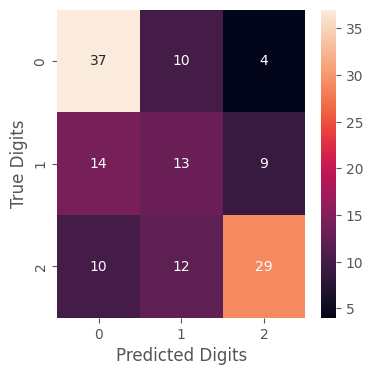

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

In [9]:
print('Accuracy de la regresión logística en los datos de test: {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy de la regresión logística en los datos de test: 0.5725


### Sobremuestreo y escalamiento

In [10]:
X_train_res, y_train_res = X_train, y_train

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [12]:
sc = StandardScaler()
X_train_res = sc.fit_transform(X_train_res)
X_test = sc.transform(X_test)

In [13]:
n_folds = 5
seed = 7
kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)

### Regresion logistica

In [14]:
# crear modelo
log_model = LogisticRegression()
#Hacer el cross validation y probar con el train
log_acc = cross_val_score(log_model, X_train_res, y_train_res, scoring='accuracy', cv=kfold)
log_prec = cross_val_score(log_model, X_train_res, y_train_res, scoring='precision_weighted', cv=kfold)
log_rec = cross_val_score(log_model, X_train_res, y_train_res, scoring='recall_weighted', cv=kfold)

# Performance
print('Accuracy: %.4f' % (np.mean(log_acc)))
print('Precision: %.4f' % (np.mean(log_prec)))
print('Recall: %.4f' % (np.mean(log_rec)))

Accuracy: 0.6430
Precision: 0.6459
Recall: 0.6430


In [15]:
log_model.fit(X_train_res,y_train_res)
y_pred = log_model.predict(X_test)

acc_lr=accuracy_score(y_test,y_pred)
prec_lr=precision_score(y_test,y_pred,average='weighted')
rec_lr=recall_score(y_test,y_pred,average='weighted')

results_lr = pd.DataFrame([['Logistic regression', acc_lr,prec_lr,rec_lr]],columns=['Model', 'ACCURACY', 'PRECISION', 'RECALL'])
results_lr

,Model,ACCURACY,PRECISION,RECALL
0,Logistic regression,0.623188,0.625693,0.623188


# SVC

In [16]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.stats import uniform

# PCA
pca = PCA(n_components=X_train_res.shape[1], whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train_res)
X_test_pca = pca.transform(X_test)

# Inicializar modelo SVC
svc = SVC(kernel='rbf', class_weight='balanced')

# Definir los hiperparámetros para la búsqueda aleatoria
param_dist = {
    'C': uniform(1, 50),  # Distribución uniforme de valores entre 1 y 50
    'gamma': uniform(0.0001, 0.01)
}

# RandomizedSearchCV con búsqueda aleatoria
grid = RandomizedSearchCV(
    svc,
    param_distributions=param_dist,
    n_iter=20,  # Realiza 20 búsquedas aleatorias
    cv=3,  # Validación cruzada con 3 folds
    n_jobs=-1,  # Utiliza todos los núcleos
    random_state=42
)

# Entrenar el modelo
grid.fit(X_train_pca, y_train_res)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores parámetros encontrados:", grid.best_params_)

# Creación del modelo con los parámetros óptimos
model_new_svc = grid.best_estimator_

# Predecir
yfit_svc = model_new_svc.predict(X_test_pca)

# Evaluación del modelo
yhat_svc = model_new_svc.predict(X_test_pca)
accu_svc = accuracy_score(y_test, yhat_svc)
prec_svc = precision_score(y_test, yhat_svc, average='weighted')
reca_svc = recall_score(y_test, yhat_svc, average='weighted')

print(f'Accuracy: {accu_svc:.3f}')
print(f'Precision: {prec_svc:.3f}')
print(f'Recall: {reca_svc:.3f}')

Mejores parámetros encontrados: {'C': 37.59969709057025, 'gamma': 0.006086584841970367}
Accuracy: 0.812
Precision: 0.821
Recall: 0.812


# RandomForest

In [ ]:
#Usando cross validation y grid search
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(criterion='gini',
                               min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               random_state=42,
                               verbose=2)


#Grid search para optimizar hiperparámetros

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11), #profundidad del árbol
                                'min_samples_split': range(1, 10, 2),
                                'n_estimators': range(1,15,2) #número de árboles
                                }, 
                  cv=kfold,
                  scoring='accuracy'
                  )


#entrenar modelo
gs.fit(X_train_res, y_train_res)


#imprimir hiperparámetros óptimos
print(gs.best_params_)

In [25]:
new_model = RandomForestClassifier(n_estimators=8,
                               criterion='gini',
                               max_depth=8,
                               min_samples_split=9,
                               min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               random_state=42,
                               verbose=2)

#entrenar nuevo modelo
new_model.fit(X_train_res, y_train_res)

building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8


RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=9,
                       n_estimators=8, random_state=42, verbose=2)

In [26]:
yhat_rf = new_model.predict(X_test)
accu_rf = accuracy_score(y_test,yhat_rf)
prec_rf = precision_score(y_test,yhat_rf,average='weighted')
reca_rf = recall_score(y_test,yhat_rf,average='weighted')
print('Accuracy\t Precision\t Recall\n %0.3f\t %0.3f\t %0.3f'%(accu_rf,prec_rf,reca_rf))

Accuracy	 Precision	 Recall
 0.696	 0.701	 0.696


### XGBoost

In [27]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Prepare the data in DMatrix format
dtrain = xgb.DMatrix(X_train_res, label=y_train_res-1)
dtest = xgb.DMatrix(X_test, label=y_test-1)

# Set parameters
params = {
    'objective': 'multi:softprob',
    'num_class': 3,
    'gamma': 1,
    'learning_rate': 0.1,
    'max_depth': 10,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'subsample': 0.9,
    'colsample_bytree': 0.5,
    'seed': 42
}

# Train the model
modelo_xgb = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtest, 'test')],
    early_stopping_rounds=10,
    verbose_eval=False
)

# Make predictions
yhat_xgb = modelo_xgb.predict(dtest)
yhat_xgb = yhat_xgb.argmax(axis=1)  # Convert probabilities to class predictions

# Evaluate the model
accu_xgb = accuracy_score(y_test-1, yhat_xgb)
prec_xgb = precision_score(y_test-1, yhat_xgb, average='weighted')
reca_xgb = recall_score(y_test-1, yhat_xgb, average='weighted')

print('Accuracy\t Precision\t Recall')
print(f'{accu_xgb:.3f}\t\t {prec_xgb:.3f}\t\t {reca_xgb:.3f}')

Accuracy	 Precision	 Recall
0.804		 0.808		 0.804


In [28]:
data_compar_cross = {'Modelo': ['LR', 'SVC','RF',' XGBoost'], 'Accuracy': [acc_lr,accu_svc,accu_rf,accu_xgb], 'Precision': [prec_lr,prec_svc,prec_rf,prec_xgb], 'Recall': [rec_lr ,reca_svc,reca_rf ,reca_xgb]}

data_compar_cross = pd.DataFrame(data_compar_cross)
data_compar_cross

,Modelo,Accuracy,Precision,Recall
0,LR,0.623188,0.625693,0.623188
1,SVC,0.811594,0.820911,0.811594
2,RF,0.695652,0.701272,0.695652
3,XGBoost,0.804348,0.808499,0.804348


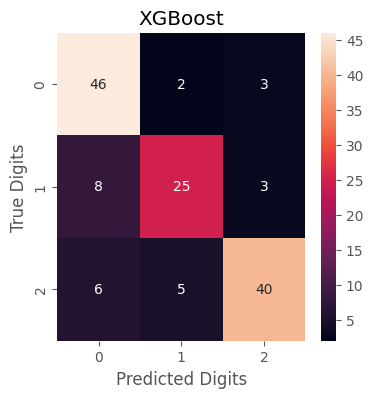

In [29]:
cm = confusion_matrix(y_test,yhat_xgb+1)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.title('XGBoost')
plt.show()

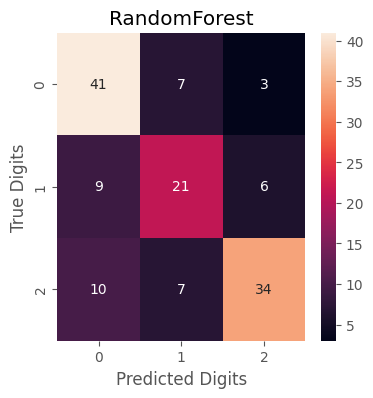

In [30]:
cm = confusion_matrix(y_test,yhat_rf)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.title('RandomForest')
plt.show()

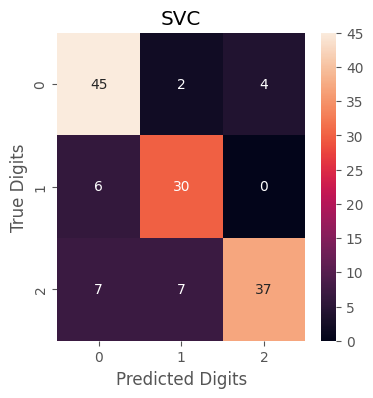

In [31]:
cm = confusion_matrix(y_test,yhat_svc)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.title('SVC')
plt.show()

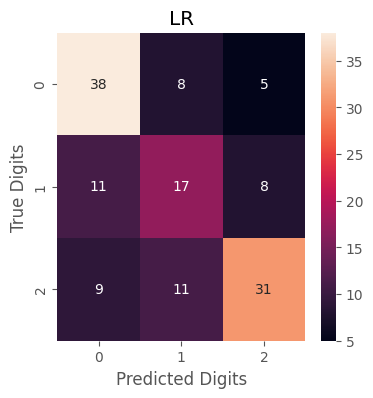

In [32]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.title('LR')
plt.show()

In [ ]:
df_pred = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'yhat_svc': yhat_svc, 'yhat_rf': yhat_rf, 'yhat_xgb': yhat_xgb+1})
df_pred.head(20)

In [ ]:
a=df_pred.head(20).index
df[['Anfitrion','Adversario','GF','GC']].iloc[a]

### Predicciones

In [33]:
new_df = pd.read_excel('Predictions Jornada7.xlsx')
new_df.head()

,Unnamed: 0,Día,Sedes,Adversario,Anfitrion,Edad(opp),Pos.(opp),Ass(opp),TPint(opp),PrgC(opp),...,RL(tm),PG(tm),PE(tm),PP(tm),GF(tm),GC(tm),xG(tm),xGA(tm),Últimos 5(tm),Máximo Goleador del Equipo(tm)
0,0,2,1,Real Sociedad,Mallorca,25.9,57.7,2,0,125,...,5,3,2,2,6,5,6.0,5.6,10,2
1,1,4,1,Athletic Club,Leganés,27.2,46.9,9,1,106,...,15,1,3,3,4,8,4.6,9.7,2,2
2,2,2,1,Valladolid,Sevilla,26.0,42.7,3,0,86,...,12,2,2,3,7,9,8.6,7.8,7,2
3,3,2,1,Osasuna,Valencia,27.5,45.7,3,1,97,...,17,1,2,4,5,10,4.3,10.3,5,2
4,4,2,1,Alavés,Real Madrid,27.0,40.0,6,2,101,...,2,5,2,0,16,5,15.6,5.0,13,5


In [34]:
predicted_df=new_df[['Día','Sedes','Edad(opp)','Pos.(opp)', 'Ass(opp)', 'TPint(opp)', 
      'PrgC(opp)', 'PrgP(opp)','% de TT(opp)', 'Dist(opp)', '% Cmp(opp)', 'Dist. tot.(opp)','TklG(opp)', 'Int(opp)', 
      'Err(opp)', 'RL(opp)', 'PG(opp)', 'PE(opp)','PP(opp)', 'GF(opp)', 'GC(opp)', 'xG(opp)', 'xGA(opp)','Últimos 5(opp)', 
      'Máximo Goleador del Equipo(opp)', 'Edad(tm)', 'Pos.(tm)', 'Ass(tm)', 'TPint(tm)', 'PrgC(tm)', 'PrgP(tm)',
      '% de TT(tm)', 'Dist(tm)', '% Cmp(tm)', 'Dist. tot.(tm)', 'TklG(tm)','Int(tm)', 'Err(tm)', 'RL(tm)', 'PG(tm)', 
      'PE(tm)', 'PP(tm)', 'GF(tm)','GC(tm)', 'xG(tm)', 'xGA(tm)', 'Últimos 5(tm)','Máximo Goleador del Equipo(tm)']]

In [35]:
predicted_df

,Día,Sedes,Edad(opp),Pos.(opp),Ass(opp),TPint(opp),PrgC(opp),PrgP(opp),% de TT(opp),Dist(opp),...,RL(tm),PG(tm),PE(tm),PP(tm),GF(tm),GC(tm),xG(tm),xGA(tm),Últimos 5(tm),Máximo Goleador del Equipo(tm)
0,2,1,25.9,57.7,2,0,125,270,26.5,18.1,...,5,3,2,2,6,5,6.0,5.6,10,2
1,4,1,27.2,46.9,9,1,106,283,35.9,17.4,...,15,1,3,3,4,8,4.6,9.7,2,2
2,2,1,26.0,42.7,3,0,86,204,15.4,18.6,...,12,2,2,3,7,9,8.6,7.8,7,2
3,2,1,27.5,45.7,3,1,97,214,30.9,17.0,...,17,1,2,4,5,10,4.3,10.3,5,2
4,2,1,27.0,40.0,6,2,101,212,30.1,17.0,...,2,5,2,0,16,5,15.6,5.0,13,5
5,3,1,29.4,49.0,8,0,80,209,31.5,21.4,...,13,2,1,3,8,10,8.3,5.9,6,2
6,3,1,27.2,44.5,2,1,72,171,19.0,21.5,...,1,6,0,0,22,5,16.9,6.4,15,6
7,4,1,28.1,55.2,4,1,109,270,28.6,18.1,...,20,0,2,4,7,12,6.0,11.6,1,3
8,4,1,28.0,42.7,8,1,94,225,32.5,15.7,...,14,2,1,3,6,9,6.3,11.3,7,3
9,4,1,29.2,51.3,8,0,93,261,35.9,15.6,...,9,3,0,3,14,13,9.6,8.1,6,3


In [36]:
sc = StandardScaler()
predicted_df = sc.fit_transform(predicted_df)

In [37]:
# Function to prepare data and make predictions
def predict_xgb(model, data):
    # Convert input data to DMatrix
    dmatrix = xgb.DMatrix(data)
    
    # Make predictions
    predictions = model.predict(dmatrix)
    
    # Convert probabilities to class predictions
    class_predictions = np.argmax(predictions, axis=1)
    
    return class_predictions

predictions_xgb = predict_xgb(modelo_xgb, predicted_df)

In [38]:
def predict_proba_xgb(model, data):
    dmatrix = xgb.DMatrix(data)
    return model.predict(dmatrix)

probabilities_xgb = predict_proba_xgb(modelo_xgb, predicted_df)

In [39]:
predictions_rf = new_model.predict(predicted_df)
predictions_rf

array([3, 1, 3, 2, 3, 3, 3, 1, 1, 3, 1, 2, 1, 3, 1, 3, 1, 2, 3, 3],
      dtype=int64)

In [40]:
predictions_svc = model_new_svc.predict(predicted_df)
predictions_svc

array([3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1],
      dtype=int64)

In [41]:
predictions_lr = log_model.predict(predicted_df)
predictions_lr

array([3, 1, 3, 2, 3, 3, 3, 2, 2, 1, 1, 3, 1, 2, 1, 1, 1, 3, 2, 3],
      dtype=int64)

In [42]:
df_pred = pd.DataFrame({'Regresión Logistica': predictions_lr, 'rf': predictions_rf,'SVC': predictions_svc,'XGB': predictions_xgb+1})
df_pred

,Regresión Logistica,rf,SVC,XGB
0,3,3,3,3
1,1,1,3,2
2,3,3,2,3
3,2,2,2,2
4,3,3,2,3
5,3,3,2,3
6,3,3,2,3
7,2,1,2,1
8,2,1,3,2
9,1,3,2,1


In [43]:
df_pred['Anfitrion']=new_df['Anfitrion']
df_pred['Rival']=new_df['Adversario']
df_pred

,Regresión Logistica,rf,SVC,XGB,Anfitrion,Rival
0,3,3,3,3,Mallorca,Real Sociedad
1,1,1,3,2,Leganés,Athletic Club
2,3,3,2,3,Sevilla,Valladolid
3,2,2,2,2,Valencia,Osasuna
4,3,3,2,3,Real Madrid,Alavés
5,3,3,2,3,Girona,Rayo Vallecano
6,3,3,2,3,Barcelona,Getafe
7,2,1,2,1,Las Palmas,Betis
8,2,1,3,2,Espanyol,Villarreal
9,1,3,2,1,Celta Vigo,Atlético Madrid


In [44]:
probabilities_xgb = pd.DataFrame(data=probabilities_xgb)
probabilities_xgb.columns = ['perder', 'empatar', 'ganar']
probabilities_xgb['Anfitrion']=new_df['Anfitrion']
probabilities_xgb['Rival']=new_df['Adversario']

In [45]:
probabilities_xgb

,perder,empatar,ganar,Anfitrion,Rival
0,0.032559,0.263357,0.704084,Mallorca,Real Sociedad
1,0.430260,0.488533,0.081207,Leganés,Athletic Club
2,0.045009,0.220192,0.734799,Sevilla,Valladolid
3,0.354439,0.509829,0.135732,Valencia,Osasuna
4,0.018364,0.096690,0.884946,Real Madrid,Alavés
5,0.281792,0.283241,0.434967,Girona,Rayo Vallecano
6,0.014122,0.049647,0.936231,Barcelona,Getafe
7,0.499515,0.414270,0.086215,Las Palmas,Betis
8,0.417471,0.461014,0.121514,Espanyol,Villarreal
9,0.681747,0.166144,0.152109,Celta Vigo,Atlético Madrid
